In [126]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib as plt

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [6]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [17]:
titles.groupby('title')['title'].agg('size').sort_values(ascending=False).head(10)

title
Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Freedom                 11
The Three Musketeers    11
Othello                 11
Kismet                  11
Maya                    11
Temptation              11
dtype: int64

### Which three years of the 1930s saw the most films released?

In [45]:
thirties=titles[(titles.year>=1930) & (titles.year<1940)]
thirties.groupby('year')['title'].size().sort_values(ascending=False).head(3)


year
1937    1194
1936    1139
1938    1127
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

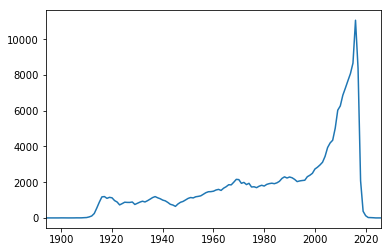

In [52]:
titles.year.value_counts().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

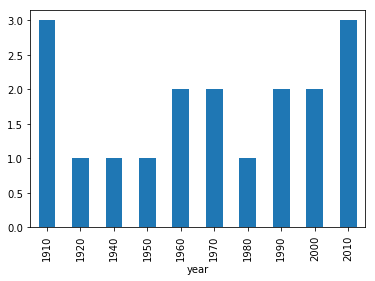

In [63]:
ham=titles[titles.title=='Hamlet']
ham.groupby(ham.year//10*10).size().plot(x='year', y='size', kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

In [65]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


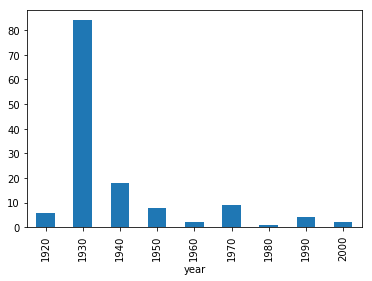

In [68]:
rust=cast[cast.character=='Rustler']
rust.groupby(rust.year//10*10).size().plot(x='year', y='size', kind='bar')

### Plot the number of "Hamlet" characters each decade.

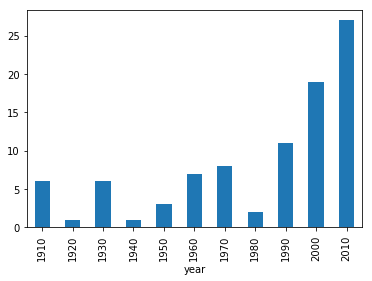

In [73]:
hamchar=cast[cast.character=='Hamlet']
hamchar.groupby(hamchar.year//10*10).size().plot(x='year', y='size', kind='bar')

### What are the 11 most common character names in movie history?

In [83]:
cast.character.value_counts().head(11)

Himself        19486
Dancer         11995
Extra          10887
Reporter        8127
Doctor          7402
Student         7146
Policeman       6855
Party Guest     6718
Nurse           6637
Bartender       6583
Minor Role      6219
Name: character, dtype: int64

SyntaxError: invalid syntax (<ipython-input-81-a422817d2b9e>, line 1)

### Who are the 10 people most often credited as "Herself" in film history?

In [84]:
herself=cast[cast.character=='Herself']
herself.name.value_counts().head(10)

Queen Elizabeth II    11
Joyce Brothers         9
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Hillary Clinton        6
Bunny Yeager           5
Caroline Rhea          5
Rekha                  5
Marilyn Monroe         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [86]:
himself=cast[cast.character=='Himself']
himself.name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            45
Ronald Reagan            39
John F. Kennedy          33
George W. Bush           23
Winston Churchill        23
Ron Jeremy               23
Benito Mussolini         22
Franklin D. Roosevelt    20
Martin Luther King       20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [97]:
fortyfive=cast[cast.year==1945]
fortyfive.name.value_counts().head(6)

Emmett Vogan       39
Sam (II) Harris    32
Harold Miller      29
Bess Flowers       29
Frank O'Connor     27
Nolan Leary        27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [102]:
eightyfive=cast[cast.year==1985]
eightyfive.name.value_counts().head(7)

Mammootty        21
Shakti Kapoor    21
Sukumari         19
Aruna Irani      15
Raj Babbar       15
Mohanlal         15
Lou Scheimer     15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

In [108]:
cast[cast.name=='Mammootty'].groupby('year')['name'].size().sort_values(ascending=False)

year
1985    21
1983    18
1986    18
1984    16
1990    15
2009    12
1989    10
2008     9
1987     9
2010     9
2006     8
2004     8
2007     7
2011     7
1982     7
2012     7
1988     7
2000     7
1991     6
2005     6
2014     6
2015     6
2013     5
1995     5
1994     5
1993     5
1998     4
1999     4
1992     3
1996     3
2016     3
2001     3
2002     3
1981     3
1997     2
1980     2
2003     2
2017     1
1971     1
dtype: int64

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [117]:
patron=cast[cast.character.str.startswith('Patron in')]
patron.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Coffee Shop            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [120]:
science=cast[cast.character.str.startswith('Science')]
science.character.value_counts().head(10)

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Kid              6
Science Reporter         5
Science Club Member      5
Science Promo Cadet      5
Science                  4
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

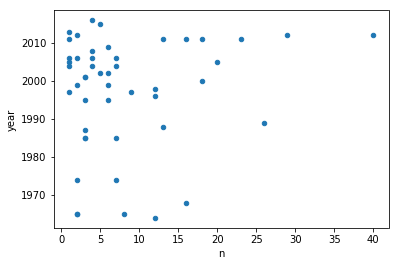

In [161]:
Judi=cast[cast.name=='Judi Dench']
Judi=Judi.loc[:, ['year', 'n']]
Judi.sort_values(by='year').plot(x='n', y='year', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

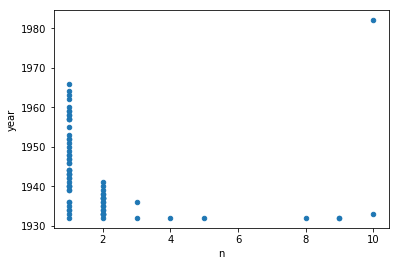

In [162]:
Cary=cast[cast.name=='Cary Grant']
Cary.loc[:, ['year', 'n']].sort_values(by='year').plot(x='n', y='year', kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

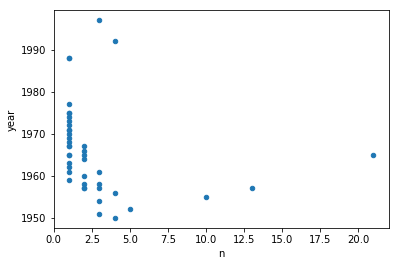

In [164]:
sid=cast[cast.name=='Sidney Poitier']
sid.loc[:, ['year', 'n']].sort_values(by='year').plot(x='n', y='year', kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [167]:
leading=cast[(cast.n==1) & (cast.year>=1950) & (cast.year<1960)]
leading.type.value_counts()

actor      6599
actress    2953
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [168]:
supporting=cast[(cast.n==2) & (cast.year>=1950) & (cast.year<1960)]
supporting.type.value_counts()

actor      4550
actress    4544
Name: type, dtype: int64